<a href="https://colab.research.google.com/github/alessioperrotti/javaDestiny_II/blob/master/Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
#from sklearn import *
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

In [4]:
dataframe = pd.read_excel("dataset_breast.xlsx")
cleandf = dataframe.drop_duplicates()
print(dataframe)

         age  menopause tumor-size inv-nodes node-caps deg-malig   breast  \
0    '40-49'  'premeno'    '15-19'     '0-2'     'yes'       '3'  'right'   
1    '50-59'     'ge40'    '15-19'     '0-2'      'no'       '1'  'right'   
2    '50-59'     'ge40'    '35-39'     '0-2'      'no'       '2'   'left'   
3    '40-49'  'premeno'    '35-39'     '0-2'     'yes'       '3'  'right'   
4    '40-49'  'premeno'    '30-34'     '3-5'     'yes'       '2'   'left'   
..       ...        ...        ...       ...       ...       ...      ...   
281  '50-59'     'ge40'    '30-34'     '6-8'     'yes'       '2'   'left'   
282  '50-59'  'premeno'    '25-29'     '3-5'     'yes'       '2'   'left'   
283  '30-39'  'premeno'    '30-34'     '6-8'     'yes'       '2'  'right'   
284  '50-59'  'premeno'    '15-19'     '0-2'      'no'       '2'  'right'   
285  '50-59'     'ge40'    '40-44'     '0-2'      'no'       '3'   'left'   

    breast-quad irradiat                   Class  
0     'left_up'     'no'

In [5]:
X = dataframe.drop(columns=['Class'])
y = dataframe['Class']

In [6]:
encoder = LabelEncoder()
X['age'] = encoder.fit_transform(X['age'])
X['menopause'] = encoder.fit_transform(X['menopause'])
X['tumor-size'] = encoder.fit_transform(X['tumor-size'])
X['inv-nodes'] = encoder.fit_transform(X['inv-nodes'])
X['node-caps'] = encoder.fit_transform(X['node-caps'])
X['deg-malig'] = encoder.fit_transform(X['deg-malig'])
X['breast'] = encoder.fit_transform(X['breast'])
X['breast-quad'] = encoder.fit_transform(X['breast-quad'])
X['irradiat'] = encoder.fit_transform(X['irradiat'])
print(X)

     age  menopause  tumor-size  inv-nodes  node-caps  deg-malig  breast  \
0      2          2           2          0          1          2       1   
1      3          0           2          0          0          0       1   
2      3          0           6          0          0          1       0   
3      2          2           6          0          1          2       1   
4      2          2           5          4          1          1       0   
..   ...        ...         ...        ...        ...        ...     ...   
281    3          0           5          5          1          1       0   
282    3          2           4          4          1          1       0   
283    1          2           5          5          1          1       1   
284    3          2           2          0          0          1       1   
285    3          0           7          0          0          2       0   

     breast-quad  irradiat  
0              2         0  
1              0         0  


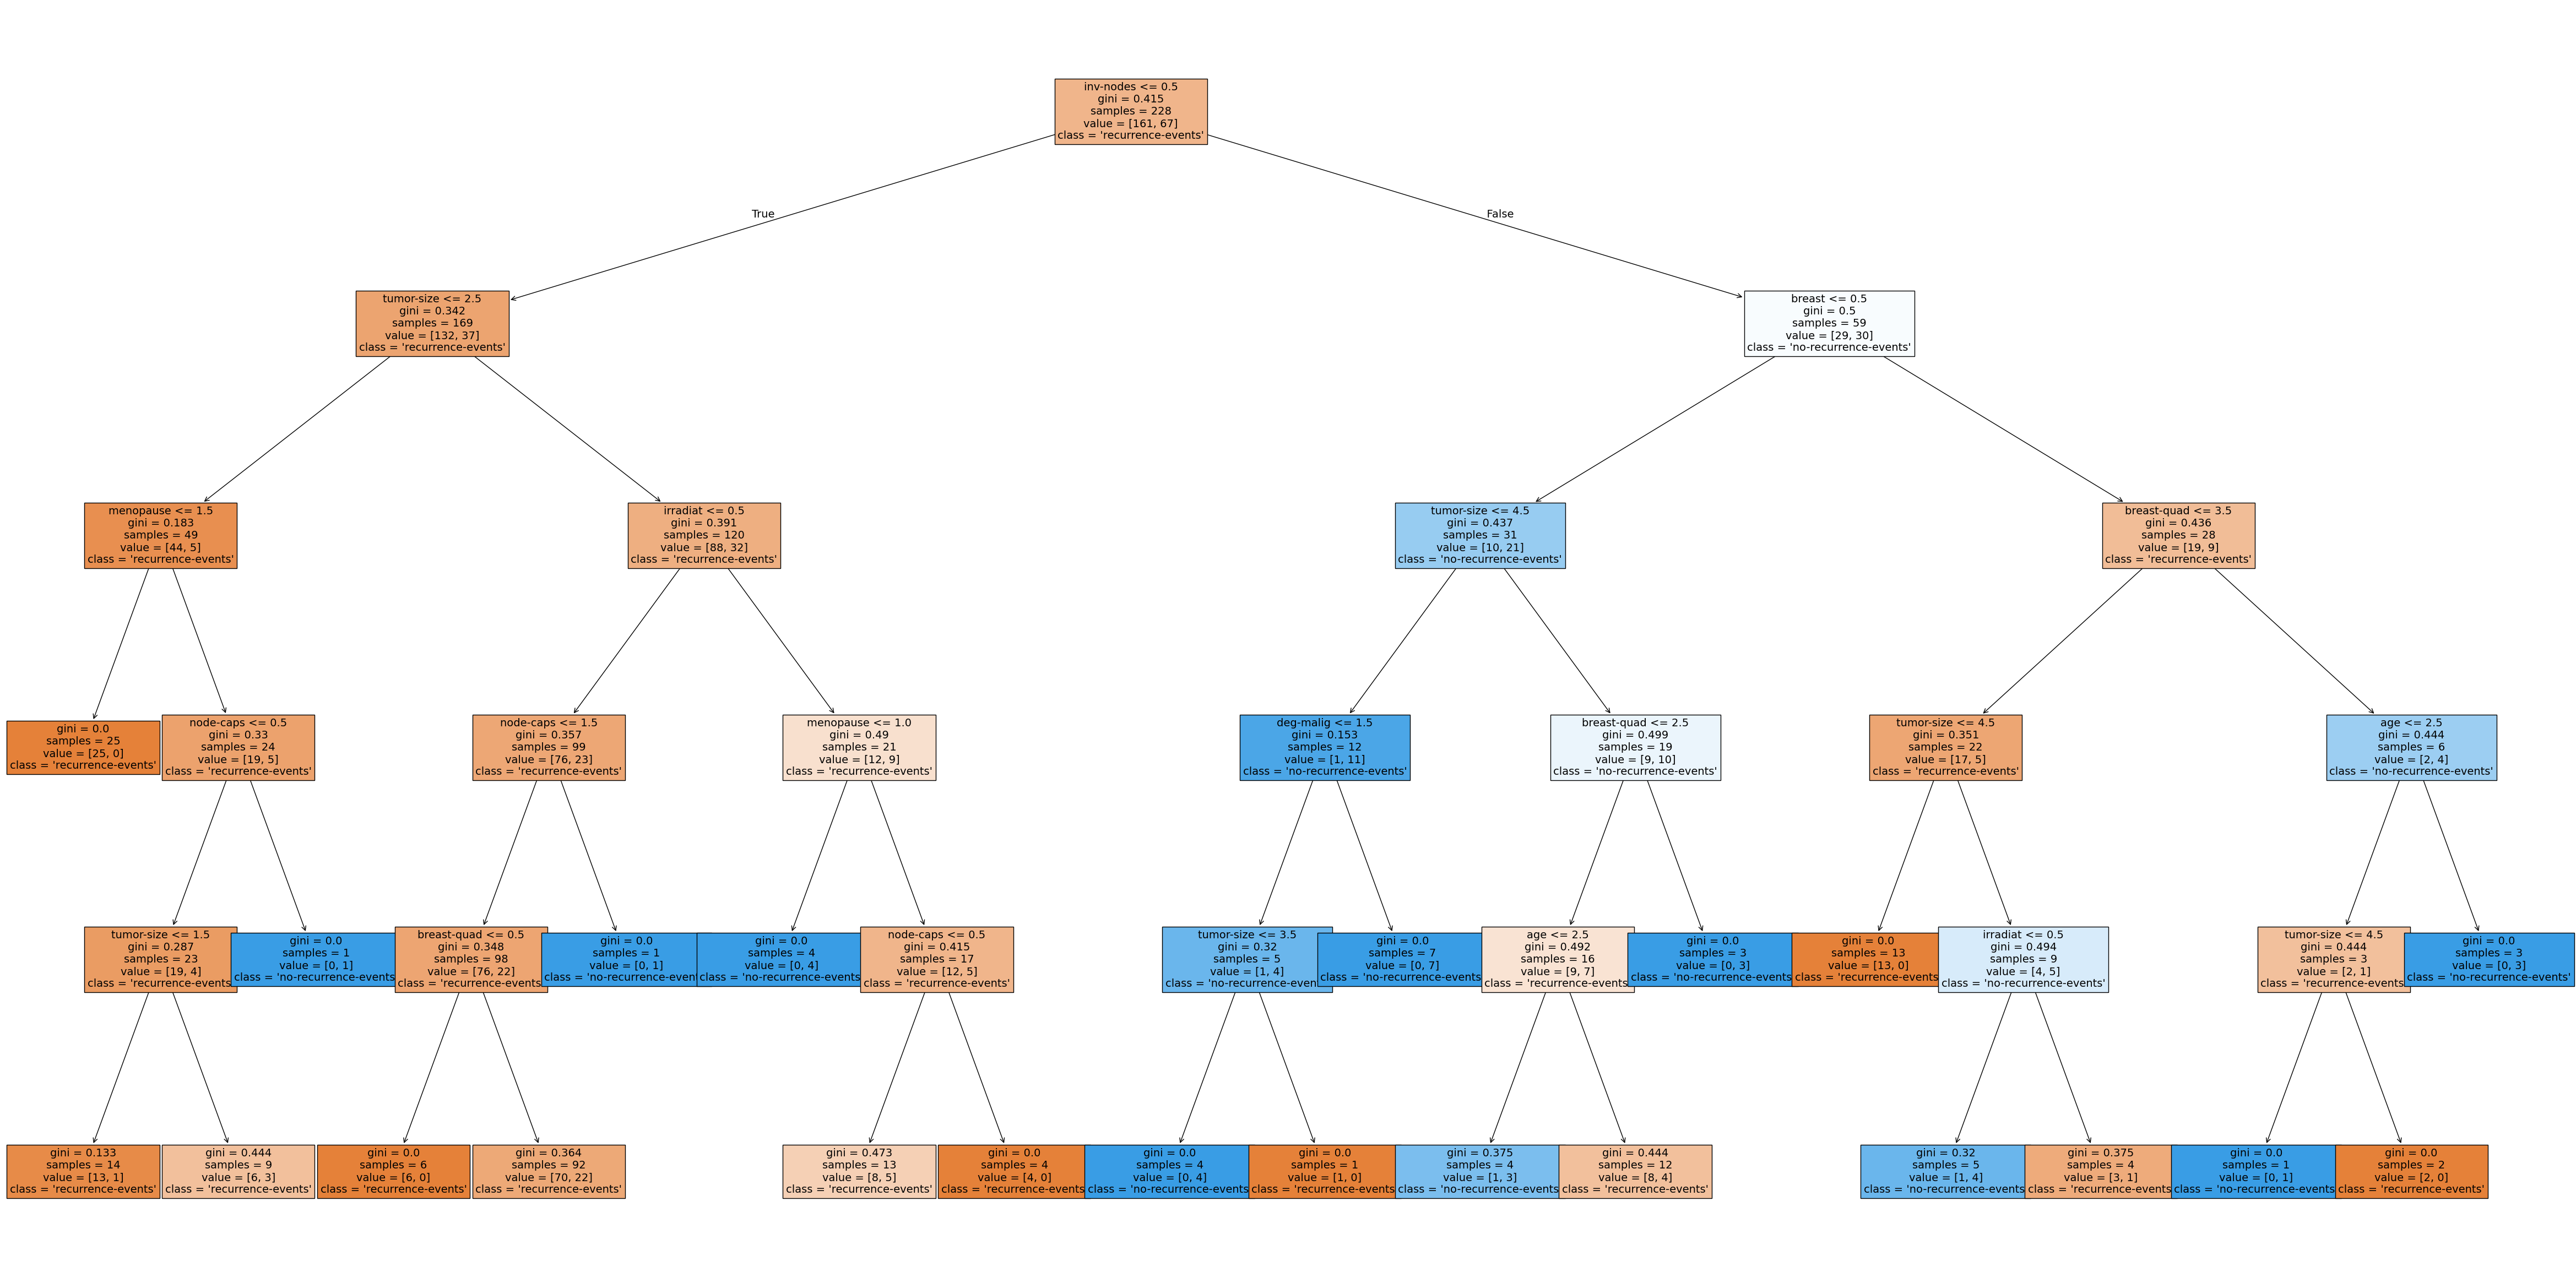

In [12]:
# Prepare for training and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
classifier = skl.tree.DecisionTreeClassifier(max_depth=5)
classifier.fit(X_train, y_train)

# Plot decision tree
plt.figure(figsize=(60, 30))
plot_tree(classifier, filled=True, feature_names=X.columns, class_names=y.unique().astype(str), fontsize=14)
plt.show()

In [13]:
print("Decision tree depth:", classifier.tree_.max_depth)

Decision tree depth: 5


**Confronto per impurità minima e profondità massima**

In [18]:
max_depth_values = [3, 5, 10, 20]
min_impurity_values = [0, 0.05, 0.1, 0.8]

# list to store results
results = []

# nested loop to compare configs
for max_depth in max_depth_values:
    for min_impurity in min_impurity_values:
        # create and train the model
        classifier = DecisionTreeClassifier(max_depth=max_depth, min_impurity_decrease=min_impurity)
        classifier.fit(X_train, y_train)

        # test the model prediction capabilities
        y_pred = classifier.predict(X_test)

        # compute accuracy
        accuracy = accuracy_score(y_test, y_pred)

        # append results to list
        results.append((max_depth, min_impurity, accuracy))

# show results
for result in results:
    print(f"Max Depth: {result[0]}, Min Impurity: {result[1]}, Accuracy: {result[2]:.4f}")


Max Depth: 3, Min Impurity: 0, Accuracy: 0.7241
Max Depth: 3, Min Impurity: 0.05, Accuracy: 0.6897
Max Depth: 3, Min Impurity: 0.1, Accuracy: 0.6897
Max Depth: 3, Min Impurity: 0.8, Accuracy: 0.6897
Max Depth: 5, Min Impurity: 0, Accuracy: 0.7069
Max Depth: 5, Min Impurity: 0.05, Accuracy: 0.6897
Max Depth: 5, Min Impurity: 0.1, Accuracy: 0.6897
Max Depth: 5, Min Impurity: 0.8, Accuracy: 0.6897
Max Depth: 10, Min Impurity: 0, Accuracy: 0.6552
Max Depth: 10, Min Impurity: 0.05, Accuracy: 0.6897
Max Depth: 10, Min Impurity: 0.1, Accuracy: 0.6897
Max Depth: 10, Min Impurity: 0.8, Accuracy: 0.6897
Max Depth: 20, Min Impurity: 0, Accuracy: 0.6552
Max Depth: 20, Min Impurity: 0.05, Accuracy: 0.6897
Max Depth: 20, Min Impurity: 0.1, Accuracy: 0.6897
Max Depth: 20, Min Impurity: 0.8, Accuracy: 0.6897


**10-Fold Cross Validation**

Accuratezza media (cross_val_score): 0.7029556650246306
Deviazione standard: 0.013589275097668675
Accuratezza ottenuta con cross_val_predict: 0.7027972027972028


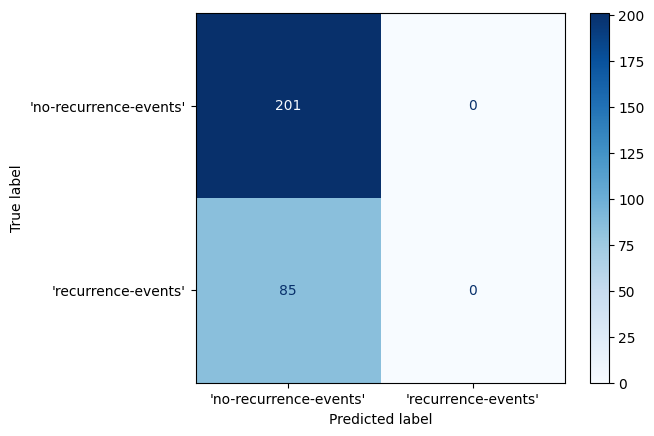

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Predizioni con cross-validation
y_pred = cross_val_predict(classifier, X_scaled, y, cv=10)

# 4. Matrice di confusione
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot(cmap='Blues')

# 5. Accuratezza
scores = cross_val_score(classifier, X_scaled, y, cv=10, scoring='accuracy')
print("Accuratezza media (cross_val_score):", scores.mean())
print("Deviazione standard:", scores.std())

accuracy = accuracy_score(y, y_pred)
print("Accuratezza ottenuta con cross_val_predict:", accuracy)